In [1]:
import os
import numpy as np
import pandas as pd

import sklearn
from cuml.neighbors import KNeighborsRegressor

from metrics import score_regression
from preprocess import get_dataset, preprocess_all, dataset_to_X_y


In [3]:
dataset = get_dataset(train_size=.8, seed=42)
dataset = preprocess_all(dataset)
X_train, y_train, X_val, y_val = dataset_to_X_y(dataset, keys="all")

In [6]:
N_NEIGHBORS = np.arange(1, 3)

train_scores = []
val_scores = []
for n in N_NEIGHBORS:
    knn_reg = KNeighborsRegressor(n_neighbors=n)
    knn_reg.fit(X_train, y_train)
    
    y_val_pred = knn_reg.predict(X_val)
    y_train_pred = knn_reg.predict(X_train)

    val_score = score_regression(y_val, y_val_pred)
    train_score = score_regression(y_train, y_train_pred)

    train_scores.append(train_score)
    val_scores.append(val_score)

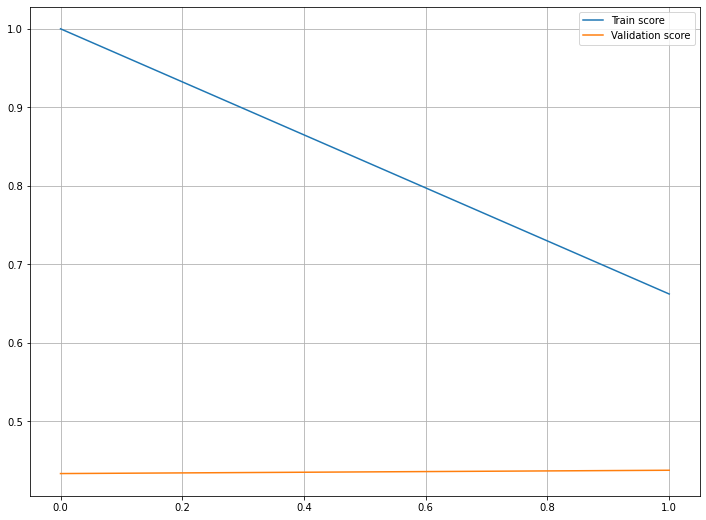

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
plt.plot(train_scores, label="Train score")
plt.plot(val_scores, label="Validation score")
plt.grid()
plt.legend()
plt.show()